# Generic analysis functions 

In [1]:
import json
import time
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from usp_stream_datasets import *

sns.set(rc={'figure.figsize':(12,6)})
tested_datasets = []

p_value = 0.05

def generate_filenames(dataset: str):
    results_folder = "results/"
    dataset_prefix = results_folder + dataset.lower().replace(".","").replace("(","").replace(")","").replace(" ","-")
    csv_file = dataset_prefix + '.csv'
    metadata_file = dataset_prefix + '_metadata.json'
    plot_file = dataset_prefix + '.jpg'
    return csv_file, metadata_file, plot_file


def open_metadata_file(filename):
    f = open (filename, "r")
    return json.loads(f.read())


def plot_p_values(series, p_value):
    g = sns.lineplot(data=series)
    g.axhline(p_value, ls='--', c='red')
    plt.figure().set_figwidth(WIDTH)
    plt.show()


def plot_multiple_p_values(dataset_name, p_value, save=False):
    csv_file, metadata_file, plot_file = generate_filenames(dataset_name)
    df_analysis = pd.read_csv(csv_file)  
    df_analysis['action'] = np.where(df_analysis['p_value'] <= p_value, 'reject', 'accept') 
    attr_list = list(df_analysis[df_analysis['action'] == 'accept'].attr.value_counts().to_dict().keys())[:5]
    df_plot = df_analysis[(df_analysis['attr'].isin(attr_list))][['p_value', 'attr', 'start']]

    plt.clf()
    title = f'p-values for {dataset_name} dataset'
    plt.title(title)
    g = sns.lineplot(x='start', y='p_value', hue='attr', data=df_plot)
    g.axhline(p_value, ls='--', c='red')
    
    if save:
        plt.savefig(plot_file)
    
    plt.show()

# Check for the available results

In [3]:
for dataset in insects_datasets.keys():
    csv_file, metadata_file, _ = generate_filenames(dataset)
    if os.path.isfile(csv_file):
        tested_datasets.append(dataset)

dataset_infos = []

for dataset in tested_datasets:
    csv_file, metadata_file, _ = generate_filenames(dataset)
    df = pd.read_csv(csv_file)
    dataset_infos.append({'dataset': dataset, 'rows': df.shape[0]})

df_rows = pd.DataFrame(dataset_infos)
df_rows = df_rows.sort_values('rows')


# Save figures

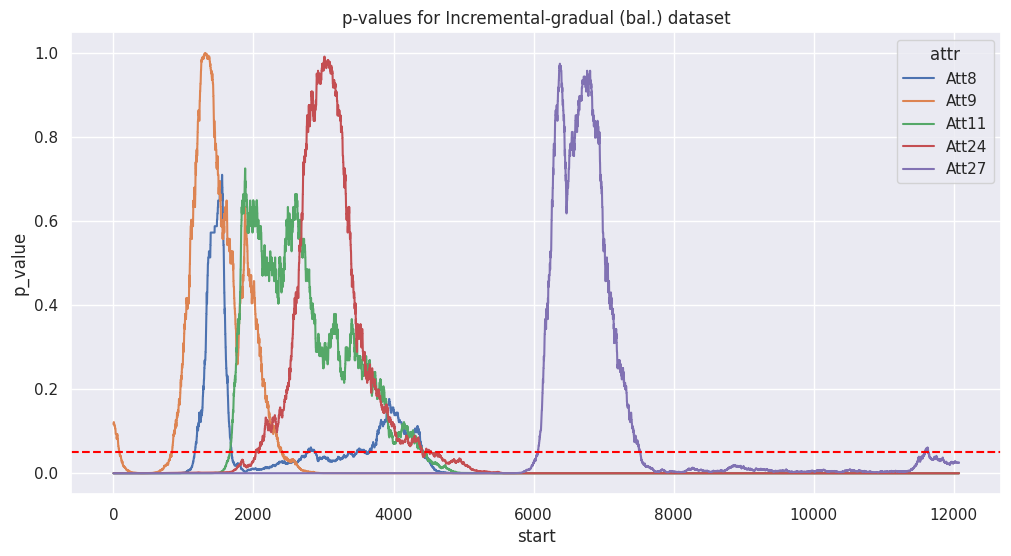

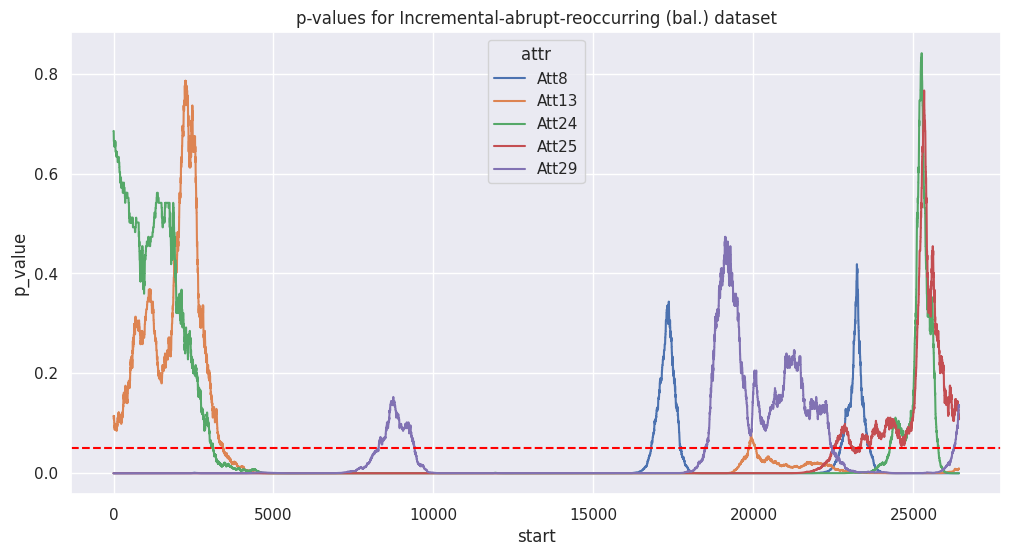

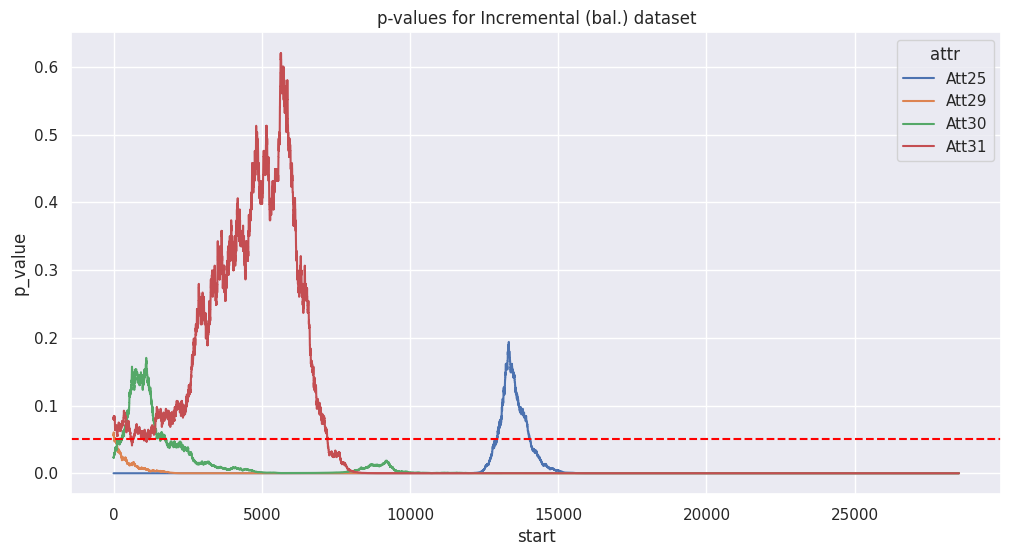

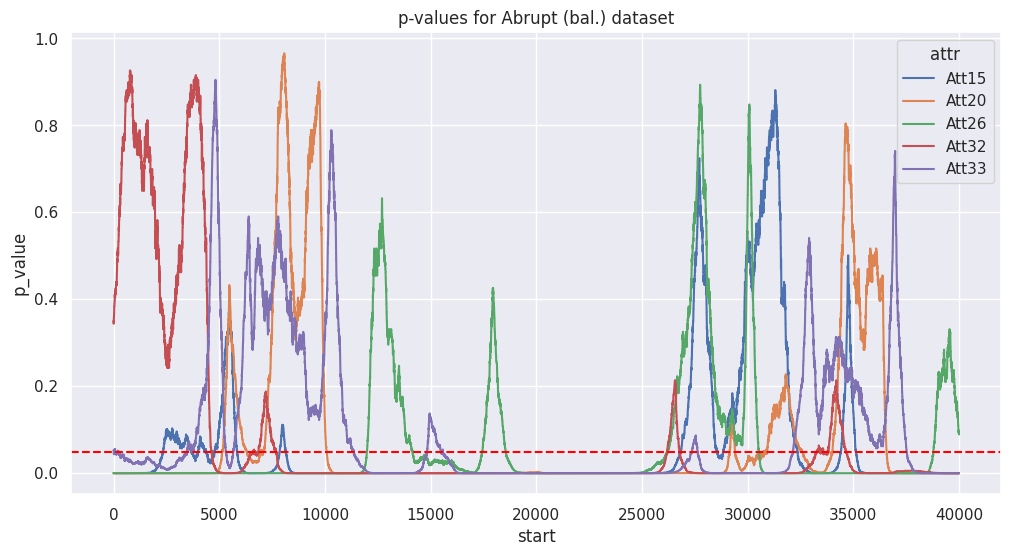

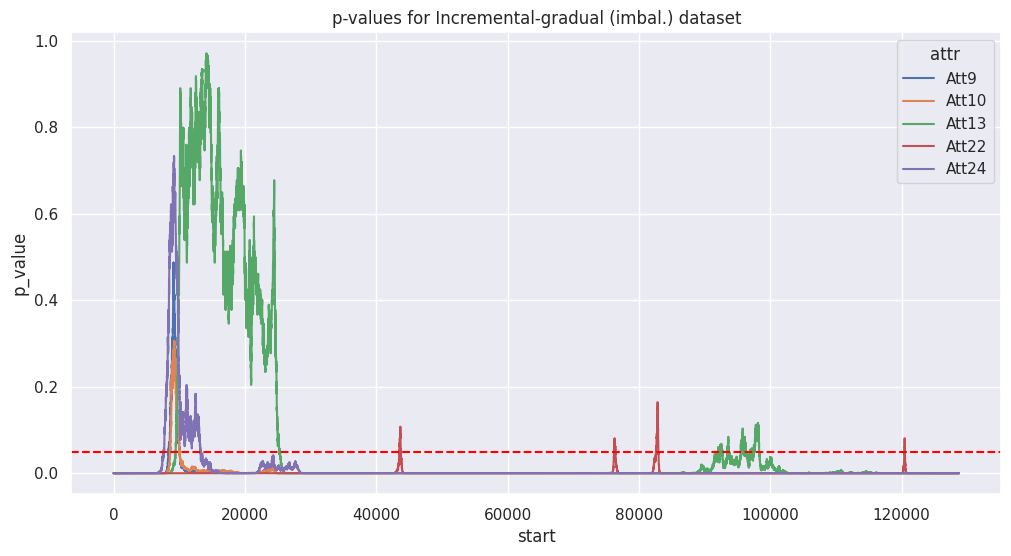

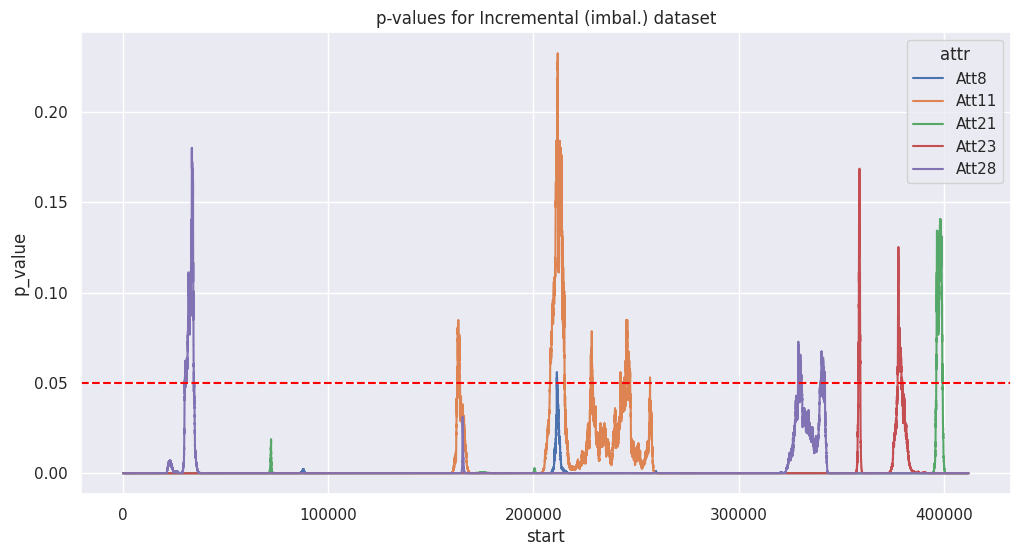

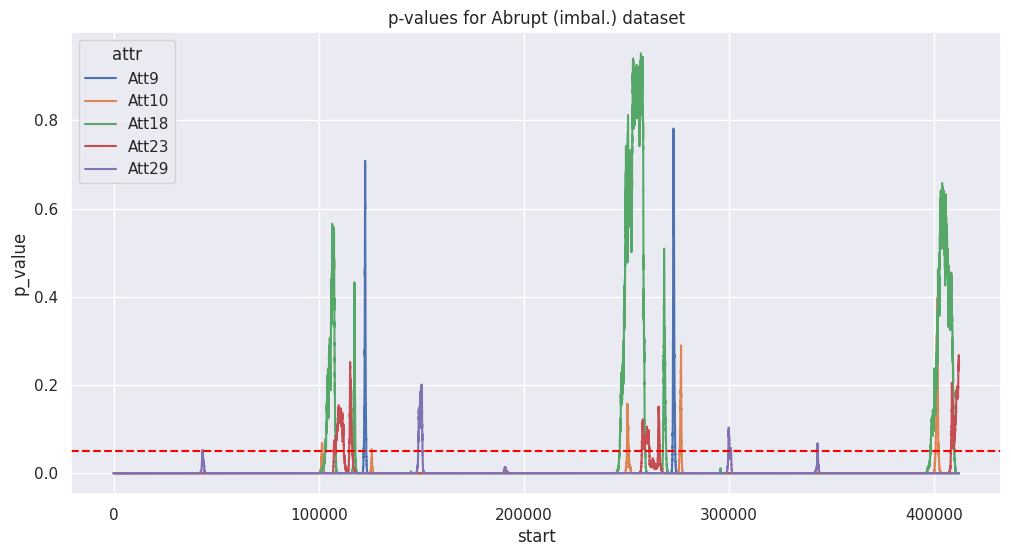

In [4]:
for dataset in df_rows.dataset.unique():
    plot_multiple_p_values(dataset, p_value, save=True)